# IBM Q Øvelse 2: Måling af to qubits (som ikke er sammenfiltrede)
### Skrevet af Anna Liv Paludan Bjerregaard

I denne opgave skal vi udvide vores forståelse om kvantekredsløb fra én qubit, til to qubits!

Vi går straks igang med at lave et kredsløb.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

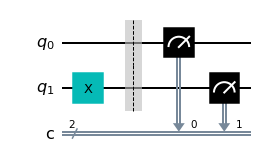

In [2]:
circuit = QuantumCircuit(2,2)
circuit.x(1)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

Bemærk at vi nu har to linjer markeret med "q", da vi har to qubits. De har subscript "0" og "1" da Python (og de fleste andre programmeringsprog) tæller fra 0. Altså er $q_0$ den første qubit og $q_1$ den anden. Vi bruger operatoren $X$ på den anden qubit. Lig også mærke til at vi nu laver to målinger - først på den første qubit og så på den anden. Den grå barriere skal du ikke tage dig af, den sørger blot for at alting ser pænt ud.

**Opgave:** Hvilken tilstand er hver qubit i? Hvad er den samlede tilstand for systemet?
Nedenfor foretages en måling på systemet, hvad er de mulige udfald?

In [3]:
sim = True
N_measure = 100

{'|00>': 0, '|10>': 100, '|01>': 0, '|11>': 0}


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


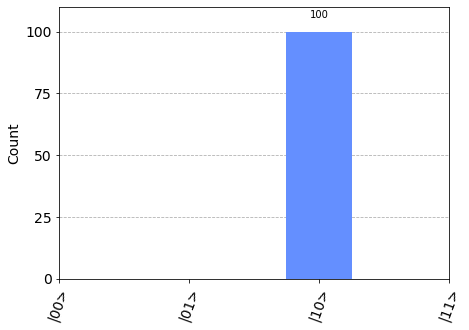

In [4]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Opgave:** Forklar histogrammet. Stemmer det overens med dine forventninger? Husk at resultatet for $q_0$ er længst til højre!

Nu prøver vi at erstatte operatoren $X$ med $H$.

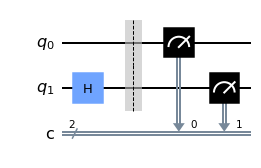

In [6]:
circuitH = QuantumCircuit(2,2)
circuitH.h(1)
circuitH.barrier()
circuitH.measure(0,0)
circuitH.measure(1,1)
circuitH.draw()

**Opgave:** Hvilken tilstand er qubitsne i før målingen? Hvad er de mulige udfald af målingen? Med hvilke sansynligheder?

In [9]:
sim = True
N_measure = 1024

{'|00>': 485, '|10>': 0, '|01>': 539, '|11>': 0}


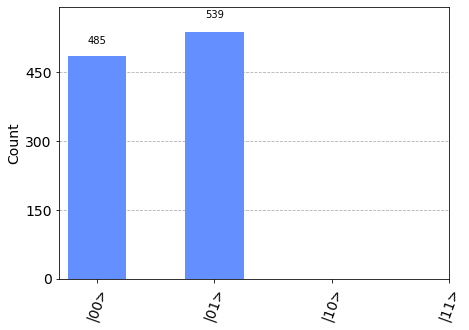

In [10]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitH, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitH, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

Du har nu prøvet at måle på to ikke sammenfiltrede qubits og er klar til at forsøge dig med at måle på sammenfiltrede qubits!

**Ekstraopgaver:** De næste to kredsløb er ekstraopgaver, men giv dem gerne et kig for at få lidt mere arbejde med systemer af to qubits.

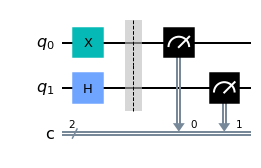

In [11]:
circuitE1 = QuantumCircuit(2,2)
circuitE1.x(0)
circuitE1.h(1)
circuitE1.barrier()
circuitE1.measure(0,0)
circuitE1.measure(1,1)
circuitE1.draw()

**Opgave:** Bekræft at kredsløbet putter qubitsne i tilstanden
$$\frac{1}{\sqrt{2}}\left(|11\rangle + |10\rangle\right)$$
Hvad er de mulige udfald hvis vi måler denne tilstand? Med hvilke sansynligheder?

In [14]:
sim = True
N_measure = 1024

{'|00>': 0, '|10>': 513, '|01>': 0, '|11>': 511}


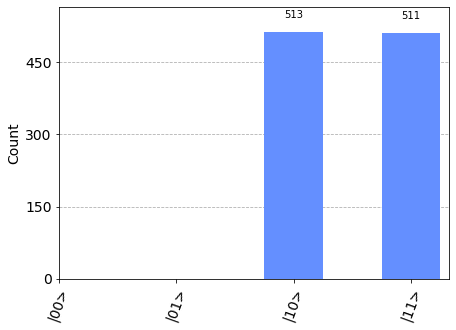

In [15]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitE1, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitE1, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','01','10','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

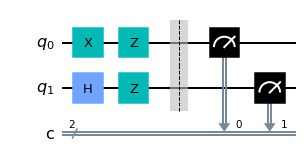

In [17]:
circuitE2 = QuantumCircuit(2,2)
circuitE2.x(0)
circuitE2.h(1)
circuitE2.z(0)
circuitE2.z(1)
circuitE2.barrier()
circuitE2.measure(0,0)
circuitE2.measure(1,1)
circuitE2.draw()

**Opgave:** Bekræft at kredsløbet putter qubitsne i tilstanden
$$\frac{1}{\sqrt{2}}\left(|11\rangle - |10\rangle\right)$$
Forventer du et andet resultat af målingen end kredsløbet foroven?

In [18]:
sim = True
N_measure = 1024

{'|00>': 0, '|10>': 509, '|01>': 0, '|11>': 515}


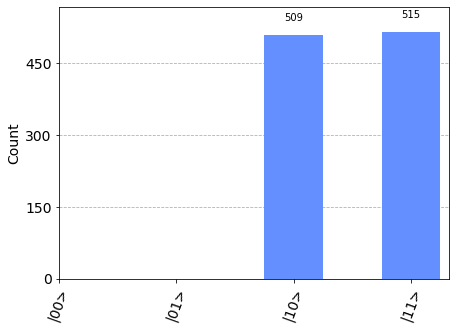

In [19]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitE2, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitE2, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

Nu har vi kigget på en masse situationer med to qubits. Har nogen af dem været sammenfiltret? Altså at målingen på den ene ville påvirke den anden? Hvad ville der ske hvis vi byttede om på rækkefølgen af målingerne?

Efter at have tænkt over de spørgsmål, så er du godt klædt på til at gå videre til næste opgave, som præcis handler om sammenfiltring!